In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pymannkendall as mk

swe_fname = '170103_Spokane.csv'

In [2]:
swe_df = pd.read_csv(swe_fname)
swe_df

,date,1983,1984,1985,1986,1987,1988,1989,1990,1991,...,2022,Min,10%,30%,70%,90%,Max,Median ('91-'20),Median (POR),Median Peak SWE
0,10-01,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.1,0.5,0.0,0.0,27.8
1,10-02,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.1,0.5,0.0,0.0,27.8
2,10-03,0.1,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.2,0.5,0.0,0.0,27.8
3,10-04,0.1,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.2,0.6,0.0,0.0,27.8
4,10-05,0.1,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.2,0.7,0.0,0.0,27.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,09-26,0.0,0.2,0.0,0.1,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,27.8
362,09-27,0.0,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,27.8
363,09-28,0.0,0.2,0.0,0.4,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,27.8
364,09-29,0.0,0.2,0.0,0.4,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.1,0.4,0.0,0.0,27.8


In [3]:
dates = swe_df['date']
dates

0      10-01
1      10-02
2      10-03
3      10-04
4      10-05
       ...  
361    09-26
362    09-27
363    09-28
364    09-29
365    09-30
Name: date, Length: 366, dtype: object

In [4]:
dates_dt = pd.DataFrame(pd.to_datetime(dates+'-2024', format='%m-%d-%Y'))
dates_dt[dates_dt['date'].dt.month >= 10] = dates_dt[dates_dt['date'].dt.month >= 10] - pd.DateOffset(years=1)
dates_dt

,date
0,2023-10-01
1,2023-10-02
2,2023-10-03
3,2023-10-04
4,2023-10-05
...,...
361,2024-09-26
362,2024-09-27
363,2024-09-28
364,2024-09-29


In [5]:
in_2_mm = 25.4

swe_min = swe_df['Min']*in_2_mm
swe_max = swe_df['Max']*in_2_mm
swe_10 = swe_df['10%']*in_2_mm
swe_30 = swe_df['30%']*in_2_mm
swe_median = swe_df['Median (\'91-\'20)']*in_2_mm
swe_70 = swe_df['70%']*in_2_mm
swe_90 = swe_df['90%']*in_2_mm
swe_maxmed = swe_df['Median Peak SWE'][0]*in_2_mm

swe_maxdate = pd.to_datetime('04-04-2024', format='%m-%d-%Y')

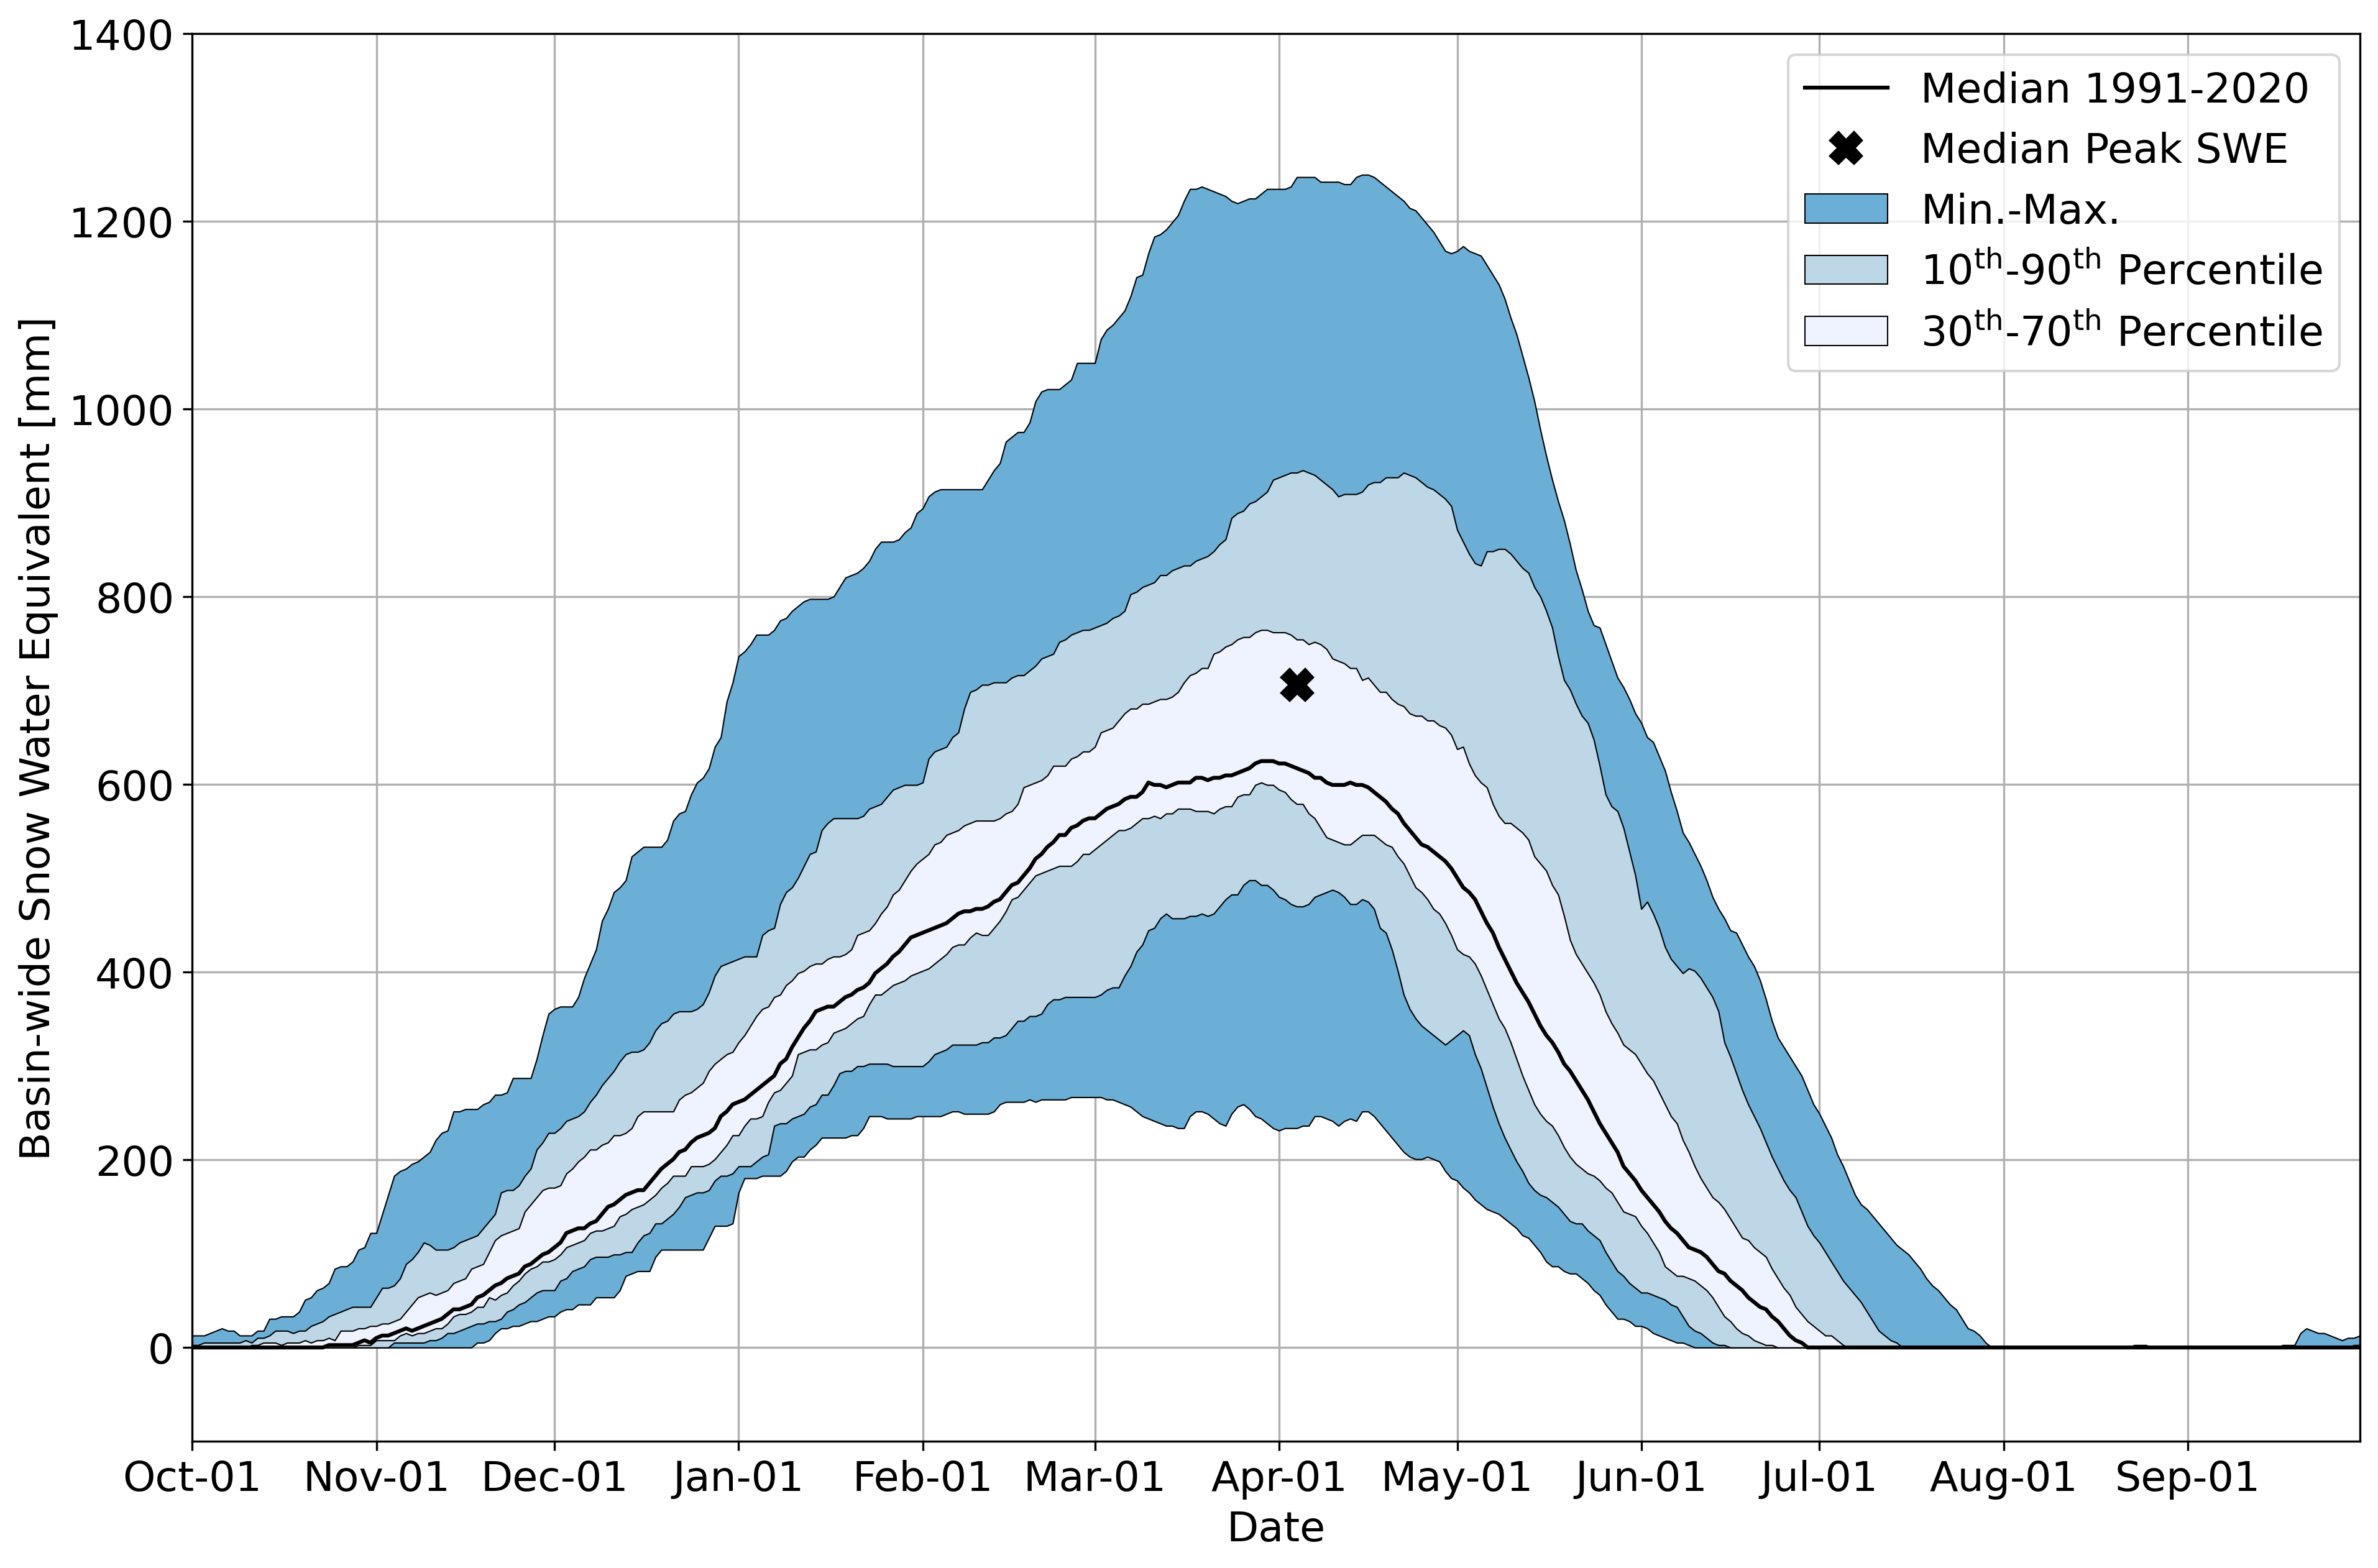

In [6]:
plt.figure(figsize=(15,10),dpi=300)
plt.rcParams.update({'font.size': 16})

plt.fill_between(dates_dt['date'].values, swe_max, swe_min, edgecolor='k', linewidth=0.5, facecolor='#6baed6', label='Min.-Max.', zorder=2.5)
plt.fill_between(dates_dt['date'].values, swe_90, swe_10, edgecolor='k', linewidth=0.5, facecolor='#bdd7e7', label='10${}^{\mathrm{th}}$-90${}^{\mathrm{th}}$ Percentile', zorder=2.5)
plt.fill_between(dates_dt['date'].values, swe_70, swe_30, edgecolor='k', linewidth=0.5, facecolor='#eff3ff', label='30${}^{\mathrm{th}}$-70${}^{\mathrm{th}}$ Percentile', zorder=2.5)
plt.plot(dates_dt['date'].values, swe_median, color='k', linewidth=1.5, label='Median 1991-2020', zorder=2.5)
plt.plot(swe_maxdate, swe_maxmed, marker='X', linewidth=0, markersize=12, color='k', label='Median Peak SWE', zorder=2.5)

plt.grid(zorder=-10)
plt.legend()

plt.xlim([pd.to_datetime('10-01-2023', format='%m-%d-%Y'), pd.to_datetime('09-30-2024', format='%m-%d-%Y')])
plt.xlabel('Date')
plt.ylim([-100.0,1400.0])
plt.ylabel('Basin-wide Snow Water Equivalent [mm]')

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))

plt.savefig('Spokane_SWE_v1.png', bbox_inches='tight')
plt.show()


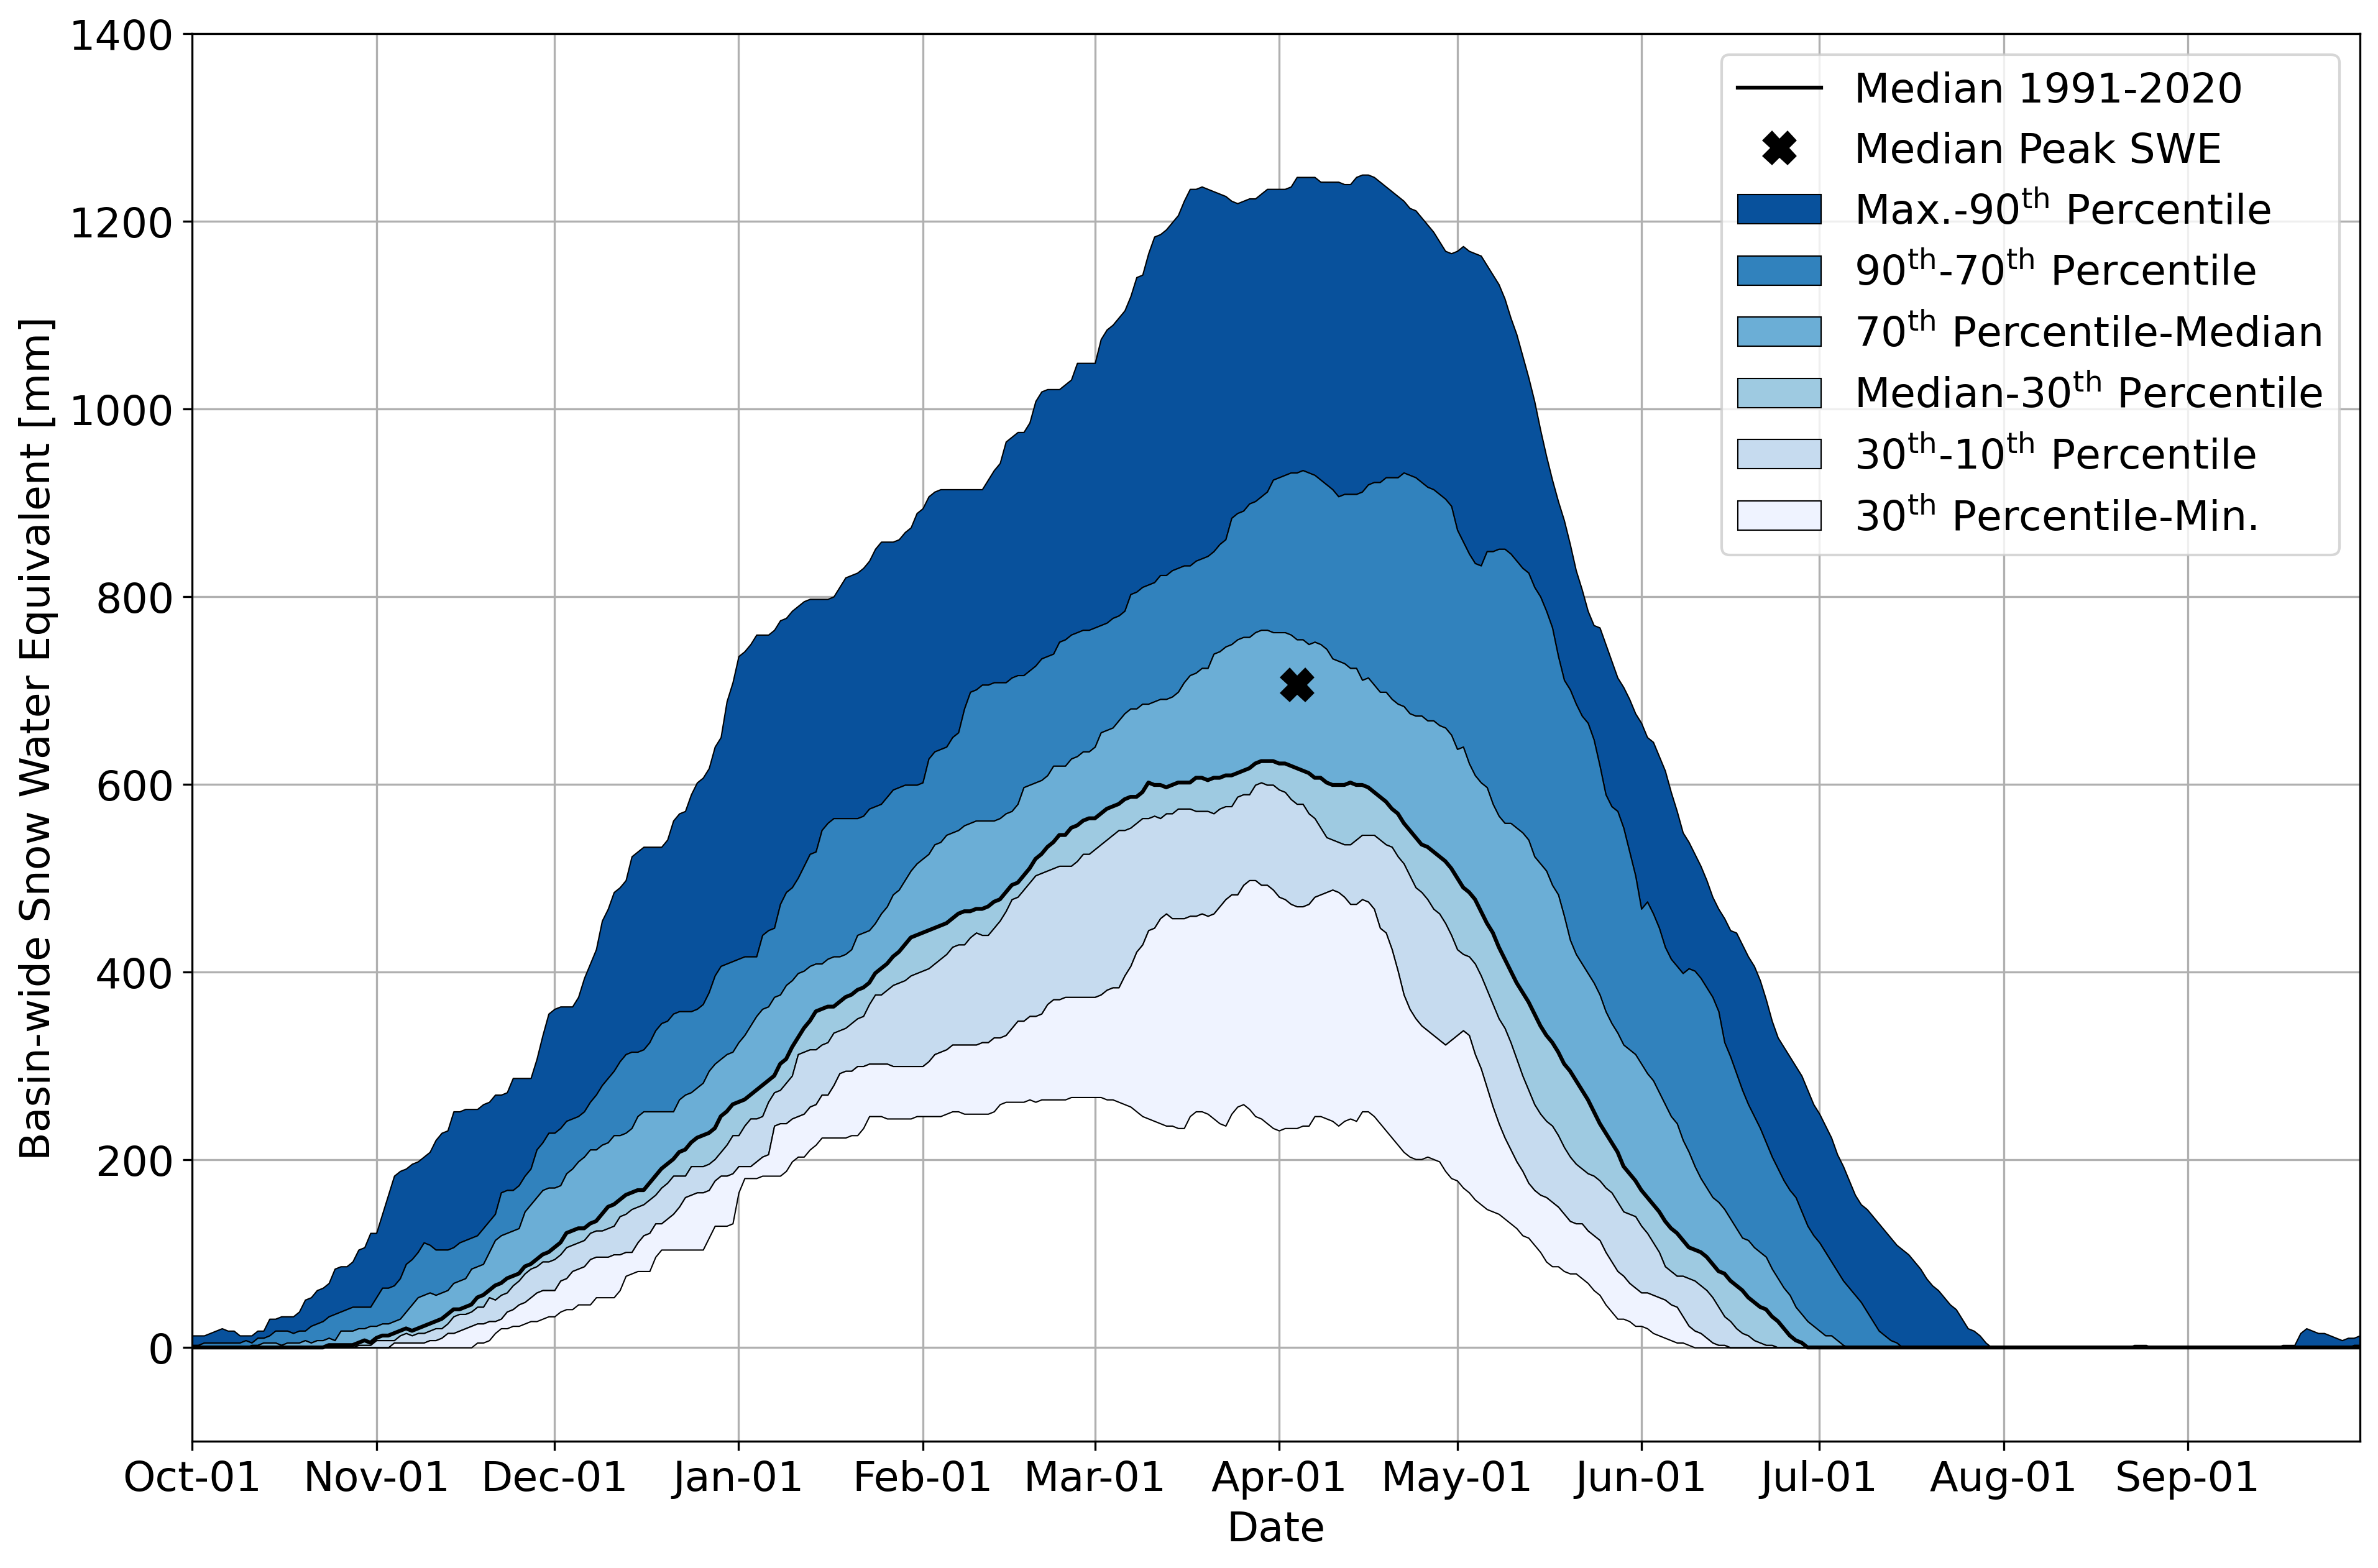

In [7]:
plt.figure(figsize=(15,10),dpi=300)
plt.rcParams.update({'font.size': 16})

plt.fill_between(dates_dt['date'].values, swe_max, swe_90, edgecolor='k', linewidth=0.5, facecolor='#08519c', label='Max.-90${}^{\mathrm{th}}$ Percentile', zorder=2.5)
plt.fill_between(dates_dt['date'].values, swe_90, swe_70, edgecolor='k', linewidth=0.5, facecolor='#3182bd', label='90${}^{\mathrm{th}}$-70${}^{\mathrm{th}}$ Percentile', zorder=2.5)
plt.fill_between(dates_dt['date'].values, swe_70, swe_median, edgecolor='k', linewidth=0.5, facecolor='#6baed6', label='70${}^{\mathrm{th}}$ Percentile-Median', zorder=2.5)
plt.fill_between(dates_dt['date'].values, swe_median, swe_30, edgecolor='k', linewidth=0.5, facecolor='#9ecae1', label='Median-30${}^{\mathrm{th}}$ Percentile', zorder=2.5)
plt.fill_between(dates_dt['date'].values, swe_30, swe_10, edgecolor='k', linewidth=0.5, facecolor='#c6dbef', label='30${}^{\mathrm{th}}$-10${}^{\mathrm{th}}$ Percentile', zorder=2.5)
plt.fill_between(dates_dt['date'].values, swe_10, swe_min, edgecolor='k', linewidth=0.5, facecolor='#eff3ff', label='30${}^{\mathrm{th}}$ Percentile-Min.', zorder=2.5)

plt.plot(dates_dt['date'].values, swe_median, color='k', linewidth=1.5, label='Median 1991-2020', zorder=2.5)
plt.plot(swe_maxdate, swe_maxmed, marker='X', linewidth=0, markersize=12, color='k', label='Median Peak SWE', zorder=2.5)

plt.grid(zorder=-10)
plt.legend()

plt.xlim([pd.to_datetime('10-01-2023', format='%m-%d-%Y'), pd.to_datetime('09-30-2024', format='%m-%d-%Y')])
plt.xlabel('Date')
plt.ylim([-100.0,1400.0])
plt.ylabel('Basin-wide Snow Water Equivalent [mm]')

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))

plt.savefig('Spokane_SWE_v2.png', bbox_inches='tight')
plt.show()


In [8]:
max_swe = swe_df.max(axis=0)
max_swe

date                12-31
1983                 34.2
1984                 29.0
1985                 36.4
1986                 25.8
1987                 26.1
1988                 27.8
1989                 33.9
1990                 31.2
1991                 32.7
1992                 23.8
1993                 24.5
1994                 21.0
1995                 24.6
1996                 27.8
1997                 49.2
1998                 21.9
1999                 44.4
2000                 30.7
2001                 18.3
2002                 38.7
2003                 21.6
2004                 26.6
2005                 14.9
2006                 28.1
2007                 23.8
2008                 39.3
2009                 28.3
2010                 17.3
2011                 39.1
2012                 33.6
2013                 22.6
2014                 29.0
2015                 12.6
2016                 23.8
2017                 25.2
2018                 32.2
2019                 22.7
2020        

In [9]:
nYr = 2021-1983+1
nYr

39

In [10]:
years = np.arange(1983,2022,1)
max_swe_ts = max_swe[1:(nYr+1)].to_numpy(dtype=np.float64) * in_2_mm

In [11]:
model = np.polyfit(years, max_swe_ts, 1)
predict = np.poly1d(model)

print(model)

max_swe_linear = predict(years)

[-3.63980972e+00  8.00050880e+03]


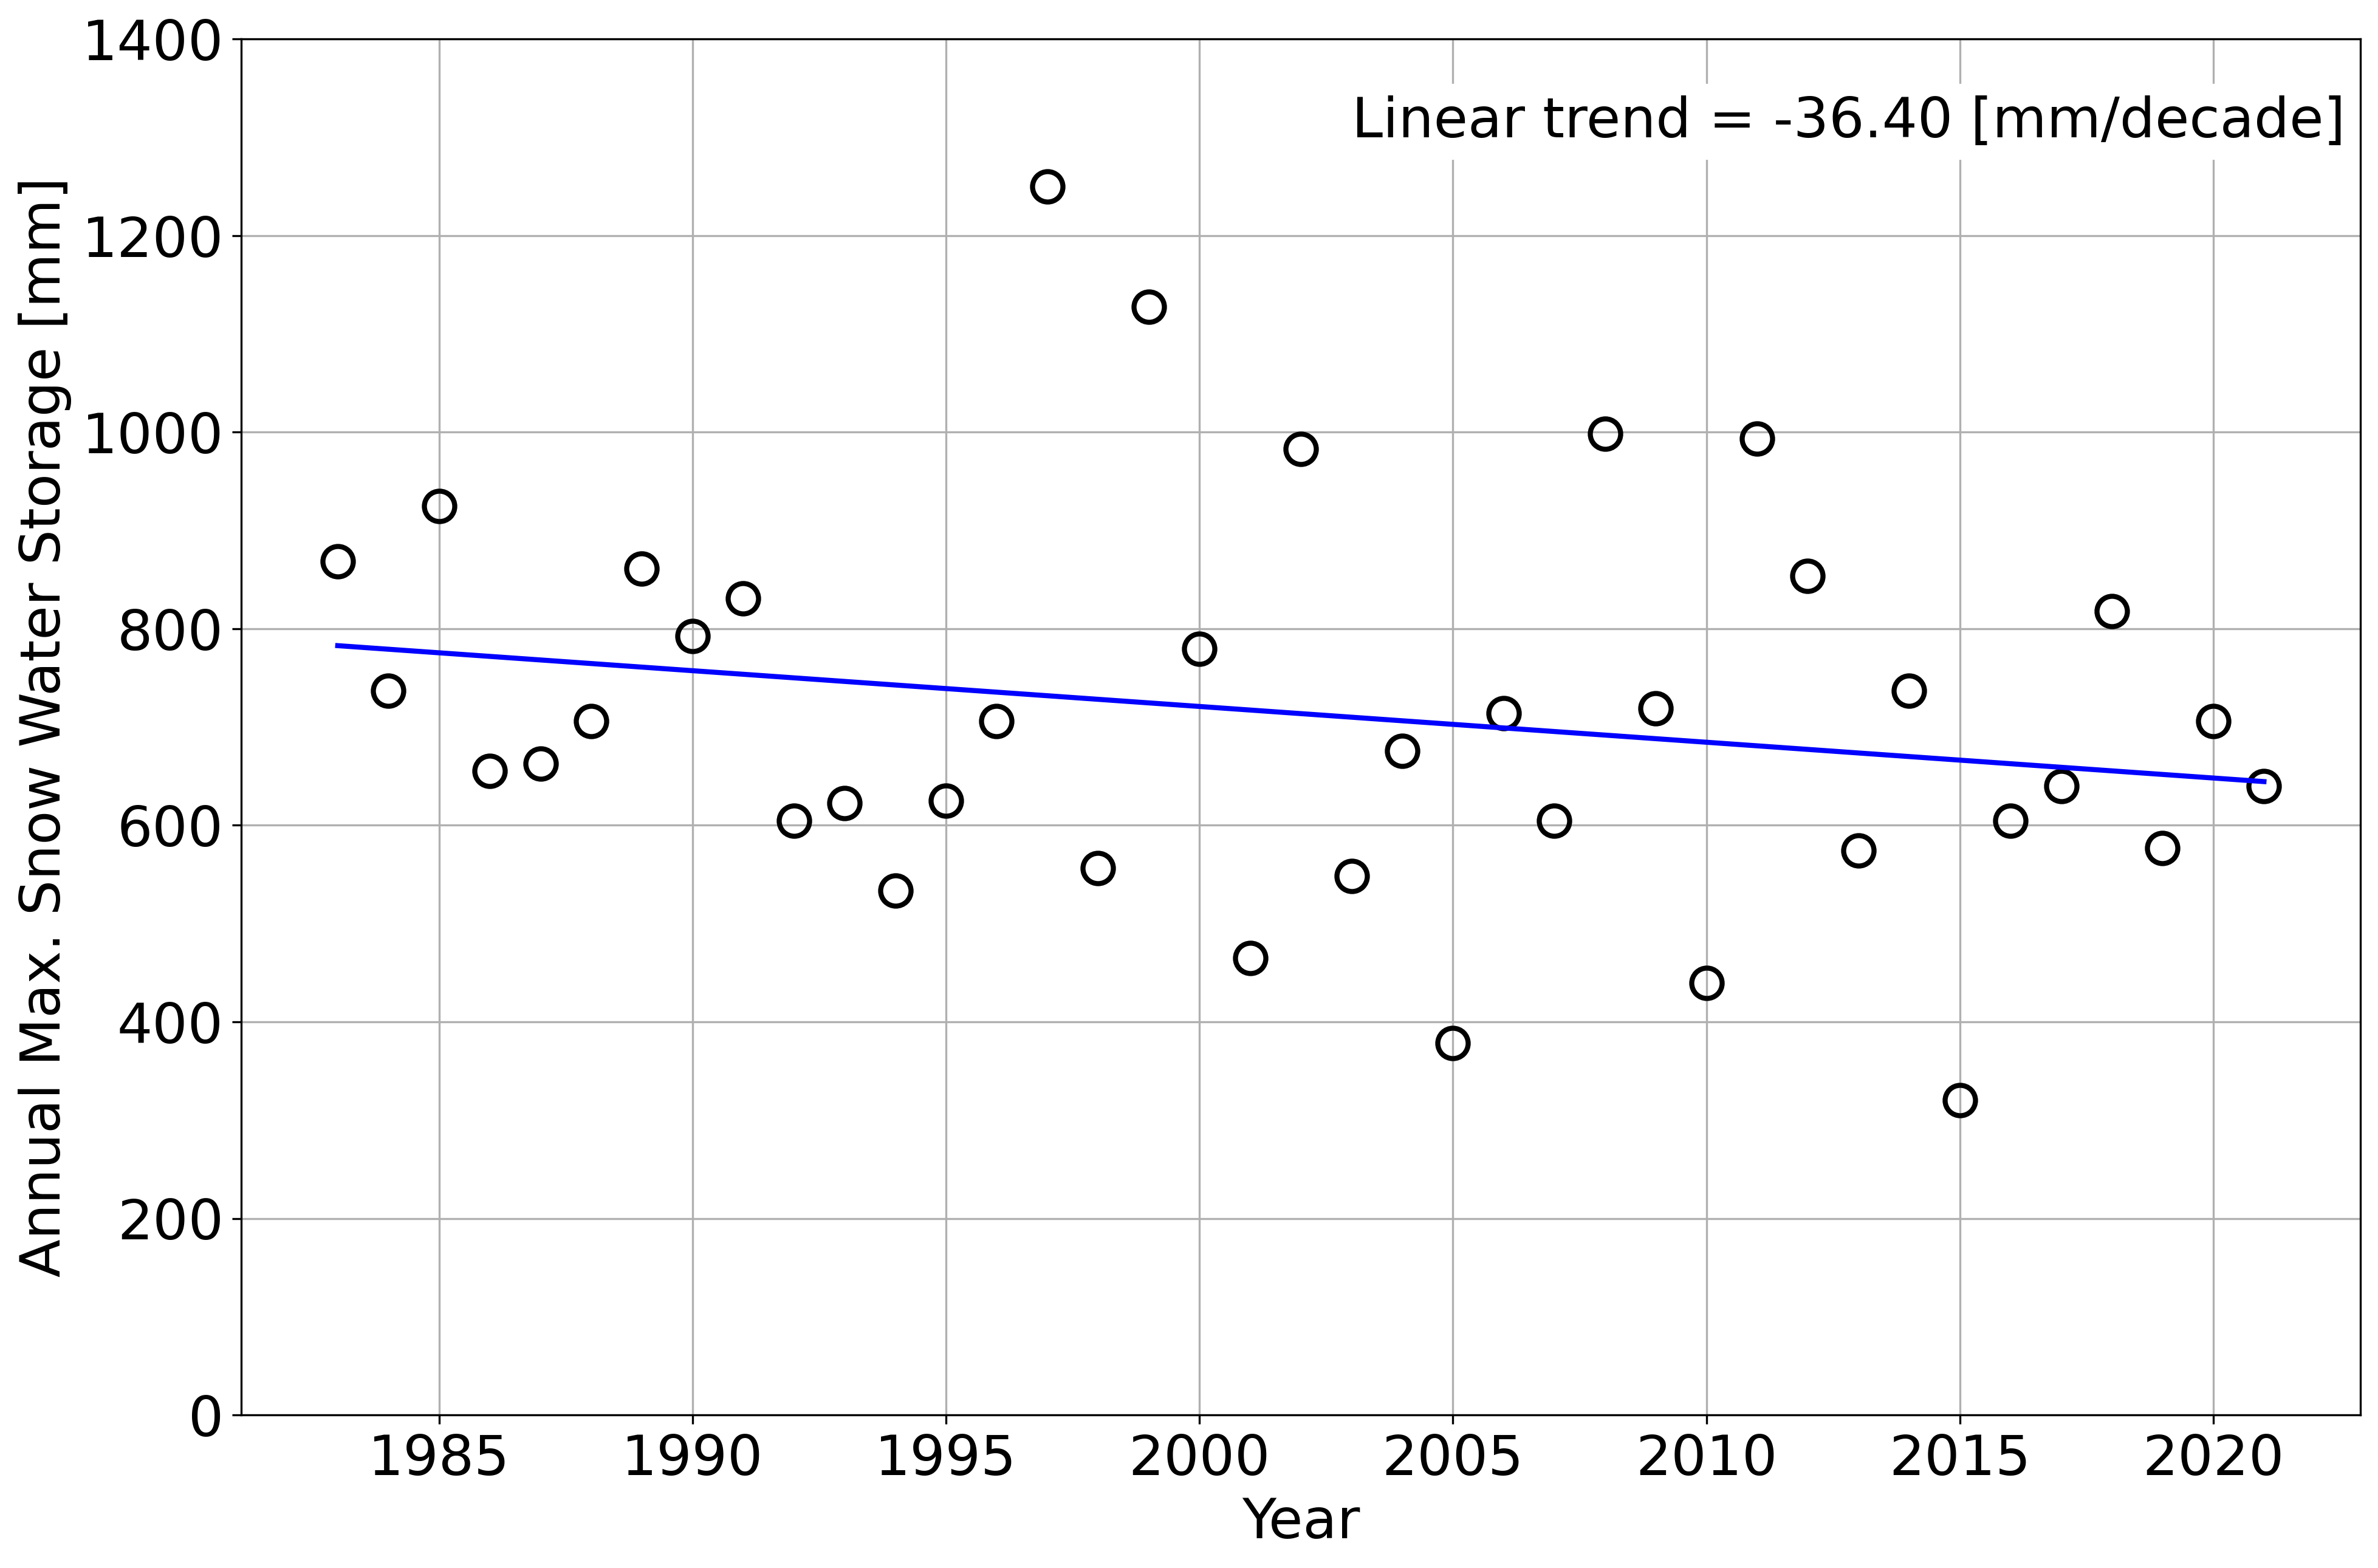

In [12]:
Eq_label = 'Linear trend = '+'{:.02f}'.format(model[0]*10)+' [mm/decade]'

plt.figure(figsize=(15,10),dpi=300)
plt.rcParams.update({'font.size': 22})

plt.plot(years,max_swe_ts,'ko', markersize=12, markerfacecolor='None', 
         markeredgewidth=2)
plt.plot(years,max_swe_linear,'b-', linewidth=2)
plt.ylim(0,1400)

plt.grid('on')
plt.ylabel('Annual Max. Snow Water Storage [mm]')
plt.xlabel('Year')
tb = plt.text(2003, 1300, Eq_label)
tb.set_bbox(dict(facecolor='w', alpha=1, edgecolor='w'))
plt.savefig('Spokane_SWE_trend.png', bbox_inches='tight')
plt.show()

In [13]:
mk.original_test(max_swe_ts)

Mann_Kendall_Test(trend='no trend', h=False, p=0.16759090162605284, z=-1.3799861747229973, Tau=-0.15519568151147098, s=-115.0, var_s=6824.333333333333, slope=-3.386666666666656, intercept=770.4666666666665)

In [14]:
mk.yue_wang_modification_test(max_swe_ts)

Modified_Mann_Kendall_Test_Yue_Wang_Approach(trend='decreasing', h=True, p=7.66790120287908e-09, z=-5.77560072515494, Tau=-0.15519568151147098, s=-115.0, var_s=389.5967973768621, slope=-3.386666666666656, intercept=770.4666666666665)

In [15]:
swe_df_dind = swe_df.set_index('date')
day_max_swe_ts = swe_df_dind.idxmax()[0:nYr].to_numpy()
max_swe_DOY = pd.to_datetime(day_max_swe_ts, format='%m-%d') - pd.to_datetime('01-01', format='%m-%d')

In [16]:
model_dms = np.polyfit(years, max_swe_DOY.days.values, 1)
predict_dms = np.poly1d(model_dms)

print(model_dms)

day_max_swe_linear = predict_dms(years)

[-1.36437247e-01  3.62301215e+02]


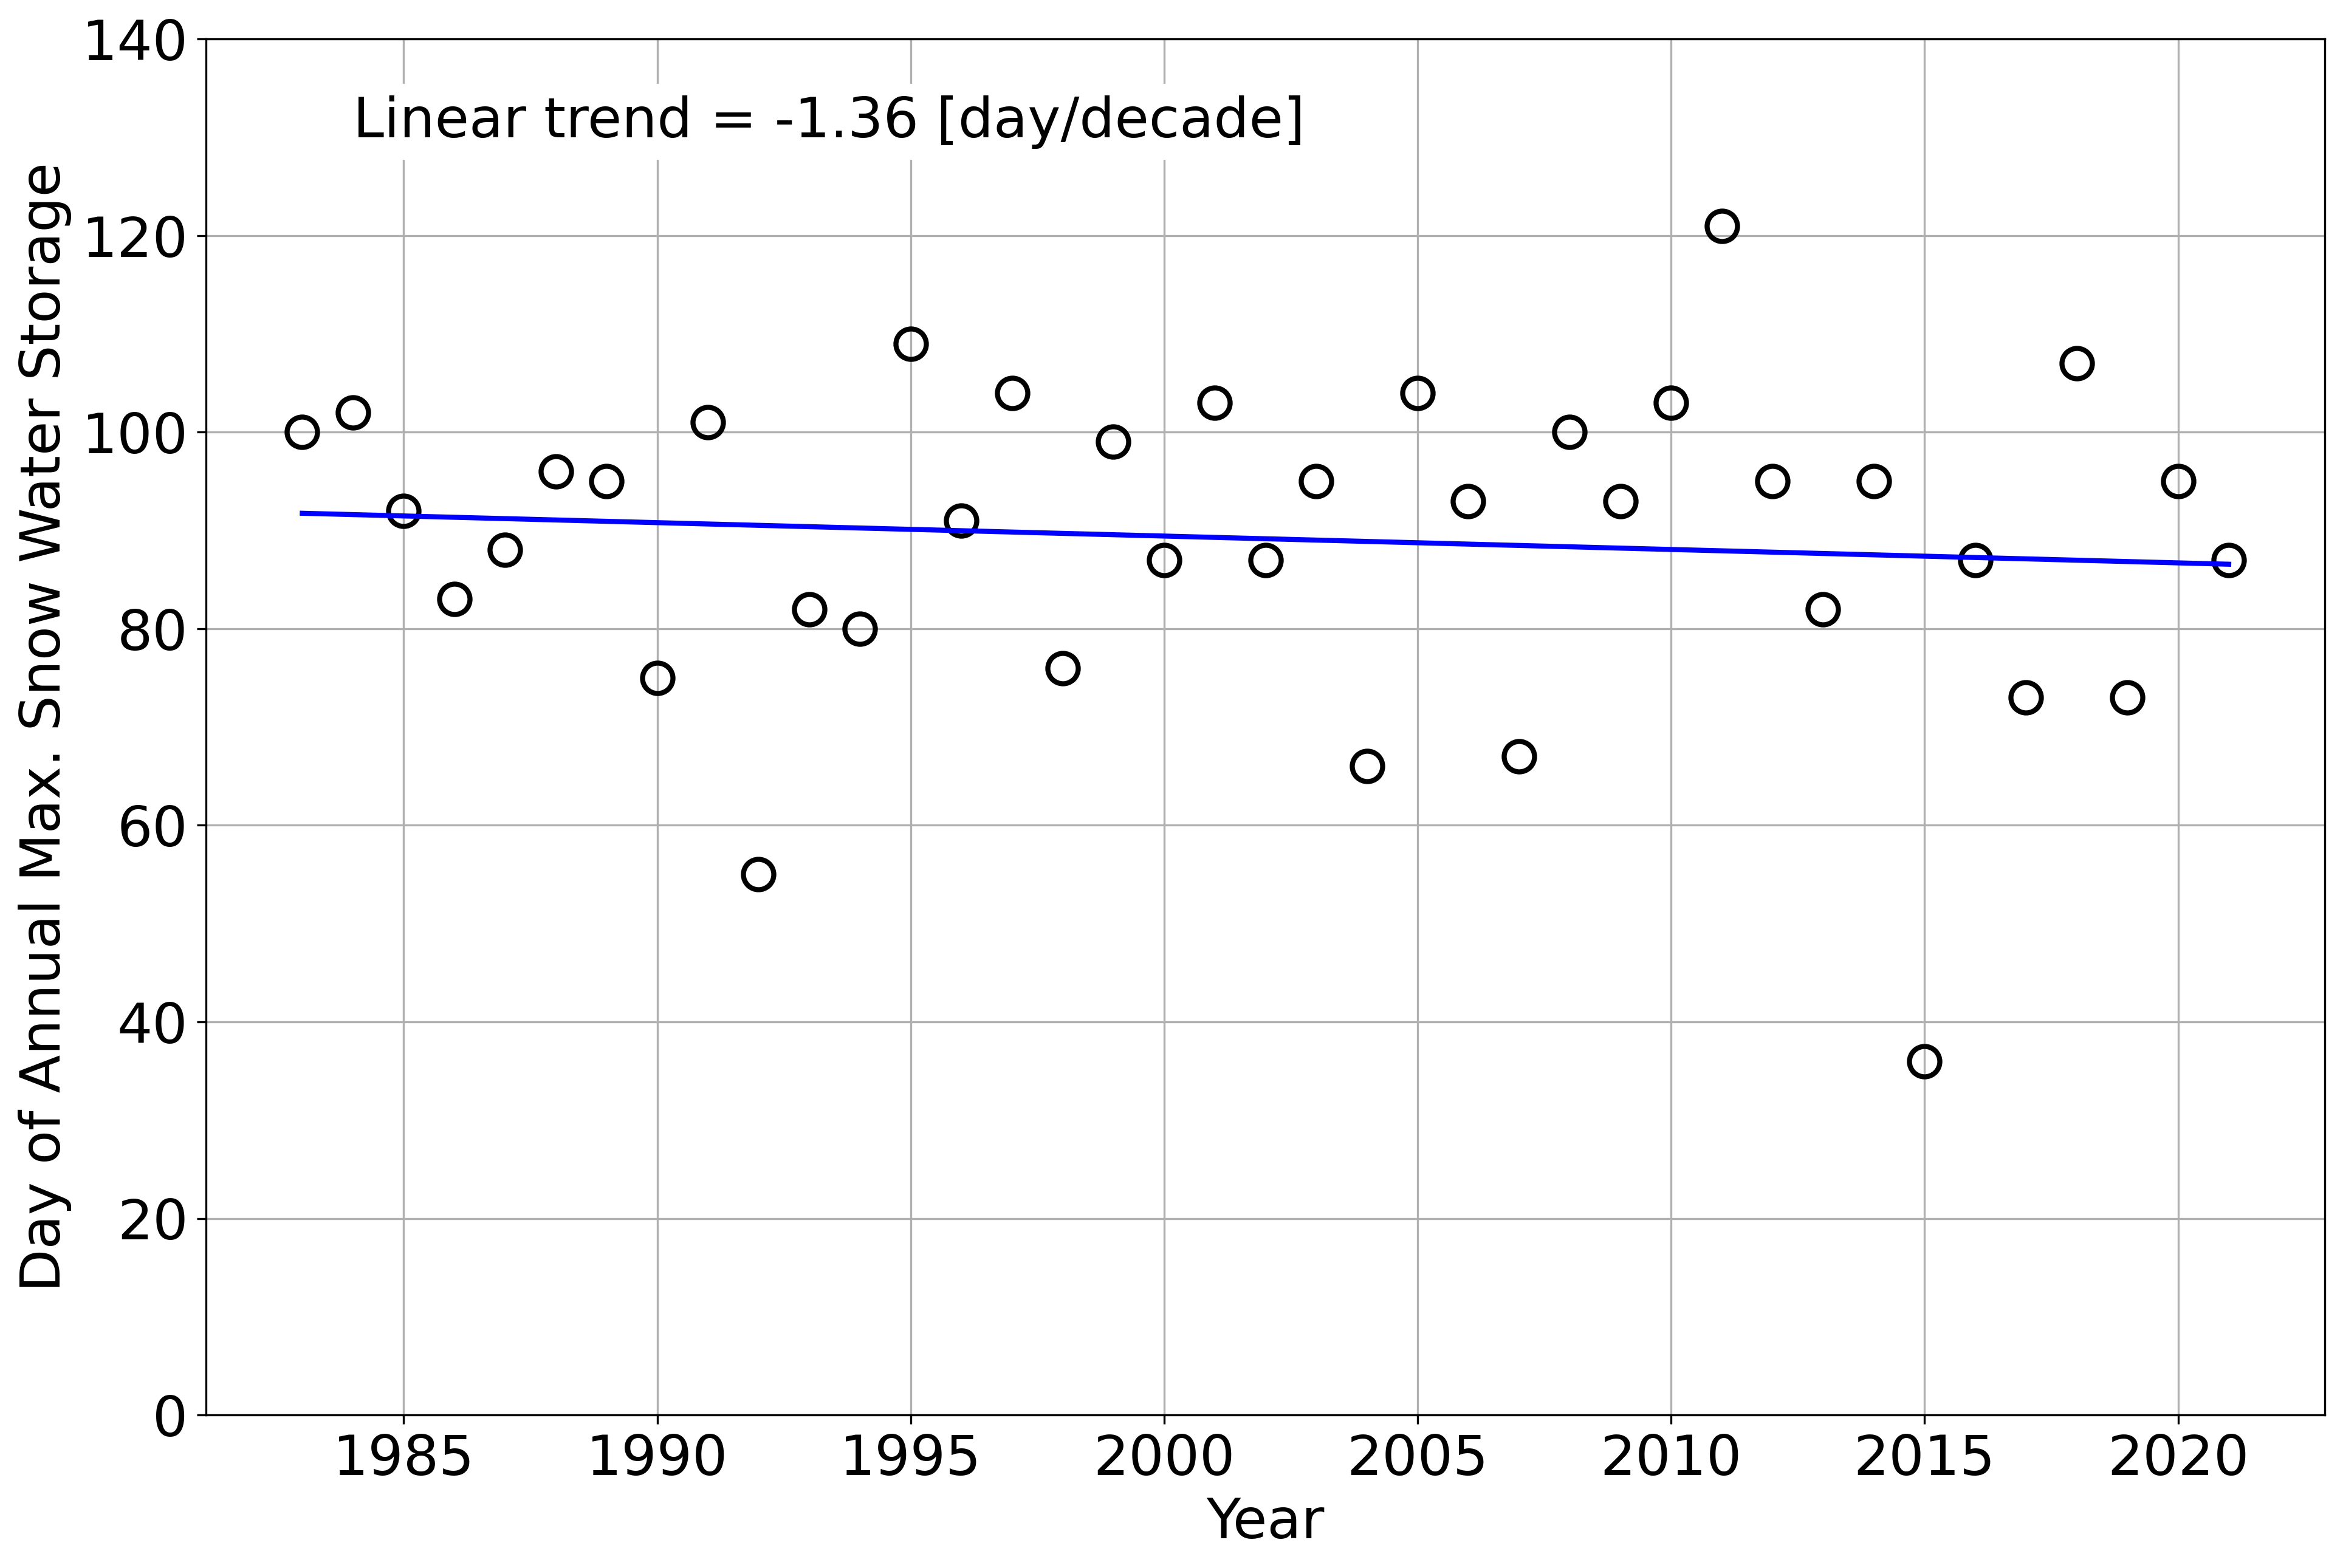

In [17]:
Eq_label = 'Linear trend = '+'{:.02f}'.format(model_dms[0]*10)+' [day/decade]'

plt.figure(figsize=(15,10),dpi=300)
plt.rcParams.update({'font.size': 22})

plt.plot(years,max_swe_DOY.days.values,'ko', markersize=12, markerfacecolor='None', 
         markeredgewidth=2)
plt.plot(years,day_max_swe_linear,'b-', linewidth=2)
plt.ylim(0,140)

plt.grid('on')
plt.ylabel('Day of Annual Max. Snow Water Storage')
plt.xlabel('Year')
tb = plt.text(1984, 130, Eq_label)
tb.set_bbox(dict(facecolor='w', alpha=1, edgecolor='w'))
plt.savefig('Spokane_Day_of_Max_SWE_trend.png', bbox_inches='tight')
plt.show()

In [18]:
mk.original_test(max_swe_DOY.days.values)

Mann_Kendall_Test(trend='no trend', h=False, p=0.6276848233722792, z=-0.48498804847563864, Tau=-0.0553306342780027, s=-41.0, var_s=6802.333333333333, slope=-0.06666666666666667, intercept=94.26666666666667)

In [19]:
mk.yue_wang_modification_test(max_swe_DOY.days.values)

Modified_Mann_Kendall_Test_Yue_Wang_Approach(trend='no trend', h=False, p=0.1269557964307757, z=-1.5262171392238724, Tau=-0.0553306342780027, s=-41.0, var_s=686.8902154471795, slope=-0.06666666666666667, intercept=94.26666666666667)